In [1]:
#Exploration initiale
import pandas as pd

# Chargement du jeu de données à partir d'un fichier CSV (par exemple)
data = pd.read_csv('C:/Users/hp/Desktop/prj_pfe_inwi/top_hier_bts_overall_d1_10000_chiffre.csv')  
# Affichage des premières lignes du jeu de données
print(data.head())
print('-----------------------------------------------------------')
# Informations sur le jeu de données
print(data.info())
print('-----------------------------------------------------------')
# Taille du jeu de données
print("Nombre d'observations :", data.shape[0])
print('-----------------------------------------------------------')
print("Nombre de variables :", data.shape[1])

# Types de données des variables
print(data.dtypes)
print('-----------------------------------------------------------')
# Statistiques descriptives sommaires
print(data.describe())
print('-----------------------------------------------------------')

# Nombre de valeurs manquantes par variable
print(data.isnull().sum())


   Unnamed: 0  date_debut                               mdn  \
0           0  2021-12-01  479e5ba06010b11c6618fff004e01a99   
1           1  2021-12-01  8dcd4c612b90296c577a7bce1cd475fd   
2           2  2021-12-01  0adf7cb1e06a2572a658ef4b5d9b0861   
3           3  2021-12-01  24316ae30425c7c0e29d904b291361c6   
4           4  2021-12-01  d588b29003e6bd796ca86dde42331d3a   

                               imsi  \
0  7f723cf242e408c9ae33705362d3229d   
1  03e5f7c2355fba57bfc89180ea0fb096   
2  e35e6bb76db99e2c3ced86cf8c7fd291   
3  acdeb52eafb753f9f41774d47ae79fe9   
4  4fa312a2473c3eb83ac6ff8ac02a5ba8   

                                                imei  \
0  f32b5d496af9b3b90bc6d7fe85367a40b4aaabaad0dc8c...   
1  f32b5d496af9b3b90bc6d7fe85367a40b4aaabaad0dc8c...   
2  f32b5d496af9b3b90bc6d7fe85367a40b4aaabaad0dc8c...   
3  f32b5d496af9b3b90bc6d7fe85367a40b4aaabaad0dc8c...   
4  f32b5d496af9b3b90bc6d7fe85367a40b4aaabaad0dc8c...   

                       idnt_contrat              

Unnamed: 0              0
date_debut              0
mdn                     0
imsi                    0
imei                    0
                       ..
princp_actv_region      0
princp_actv_province    0
princp_vol_actv         0
princp_vol_actv_unit    0
idnt_date               0
Length: 80, dtype: int64


In [11]:
print(data.columns)

Index(['Unnamed: 0', 'date_debut', 'mdn', 'imsi', 'imei', 'idnt_contrat',
       'idnt_client_crm', 'idnt_compte_facturation', 'idnt_profil',
       'desc_profil', 'sous_profil', 'gamme', 'marche', 'segment', 'type_jour',
       'princp_data_vol_jour_octets', 'princp_data_vol_jour_cell',
       'princp_data_vol_jour_secteur', 'princp_data_vol_jour_bts',
       'princp_data_vol_jour_ville', 'princp_data_vol_jour_region',
       'princp_data_vol_jour_province', 'princp_data_vol_soir_octets',
       'princp_data_vol_soir_cell', 'princp_data_vol_soir_secteur',
       'princp_data_vol_soir_bts', 'princp_data_vol_soir_ville',
       'princp_data_vol_soir_region', 'princp_data_vol_soir_province',
       'princp_data_vol_nuit_octets', 'princp_data_vol_nuit_cell',
       'princp_data_vol_nuit_secteur', 'princp_data_vol_nuit_bts',
       'princp_data_vol_nuit_ville', 'princp_data_vol_nuit_region',
       'princp_data_vol_nuit_province', 'princp_data_vol_total_octets',
       'princp_data_vol_tot

In [13]:
columns_to_drop1 =['date_debut','idnt_date','type_jour','princp_actv_region','imei','segment']
data= data.drop(columns=columns_to_drop1)
data = data.drop(data.columns[0], axis=1) 


In [14]:
descriptive_stats = data.describe()
print(descriptive_stats)

       princp_data_vol_jour_octets  princp_data_vol_soir_octets  \
count                 1.000000e+05                 1.000000e+05   
mean                  3.495888e+08                 3.003215e+08   
std                   9.423186e+08                 6.933702e+08   
min                   0.000000e+00                 0.000000e+00   
25%                   0.000000e+00                 6.202500e+02   
50%                   5.434544e+07                 7.451311e+07   
75%                   2.640192e+08                 2.834166e+08   
max                   2.666193e+10                 1.996497e+10   

       princp_data_vol_nuit_octets  princp_data_vol_total_octets  \
count                 1.000000e+05                  1.000000e+05   
mean                  1.298656e+08                  7.276151e+08   
std                   4.261005e+08                  1.725299e+09   
min                   0.000000e+00                  0.000000e+00   
25%                   0.000000e+00                  1.62

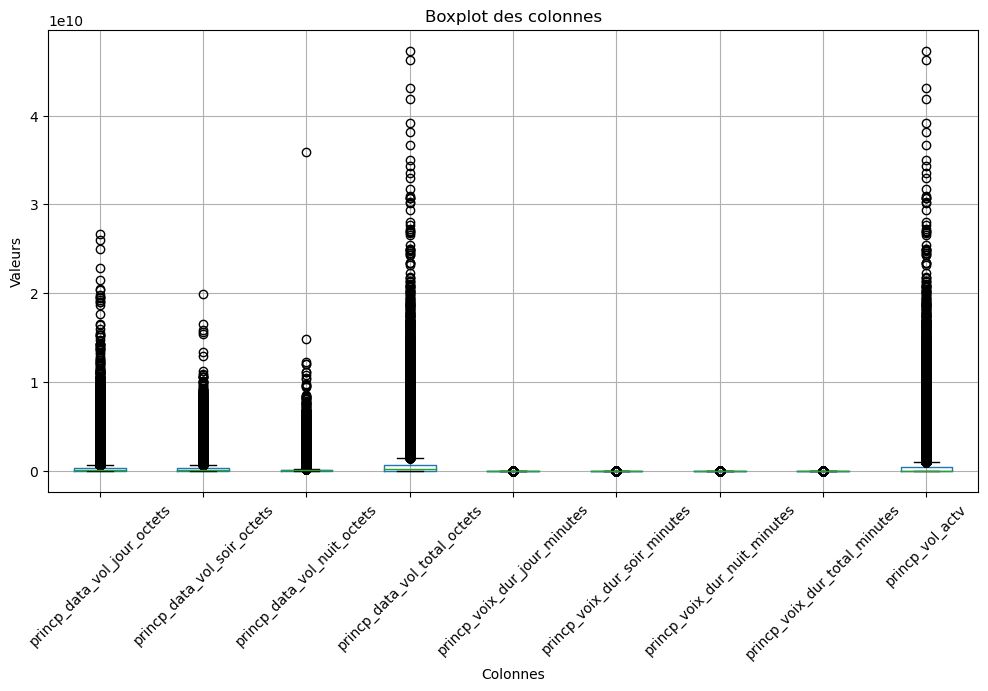

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
data.boxplot(column=['princp_data_vol_jour_octets', 'princp_data_vol_soir_octets', 'princp_data_vol_nuit_octets',
                   'princp_data_vol_total_octets', 'princp_voix_dur_jour_minutes', 'princp_voix_dur_soir_minutes',
                   'princp_voix_dur_nuit_minutes', 'princp_voix_dur_total_minutes', 'princp_vol_actv'])
plt.xticks(rotation=45)
plt.title('Boxplot des colonnes')
plt.xlabel('Colonnes')
plt.ylabel('Valeurs')
plt.show()

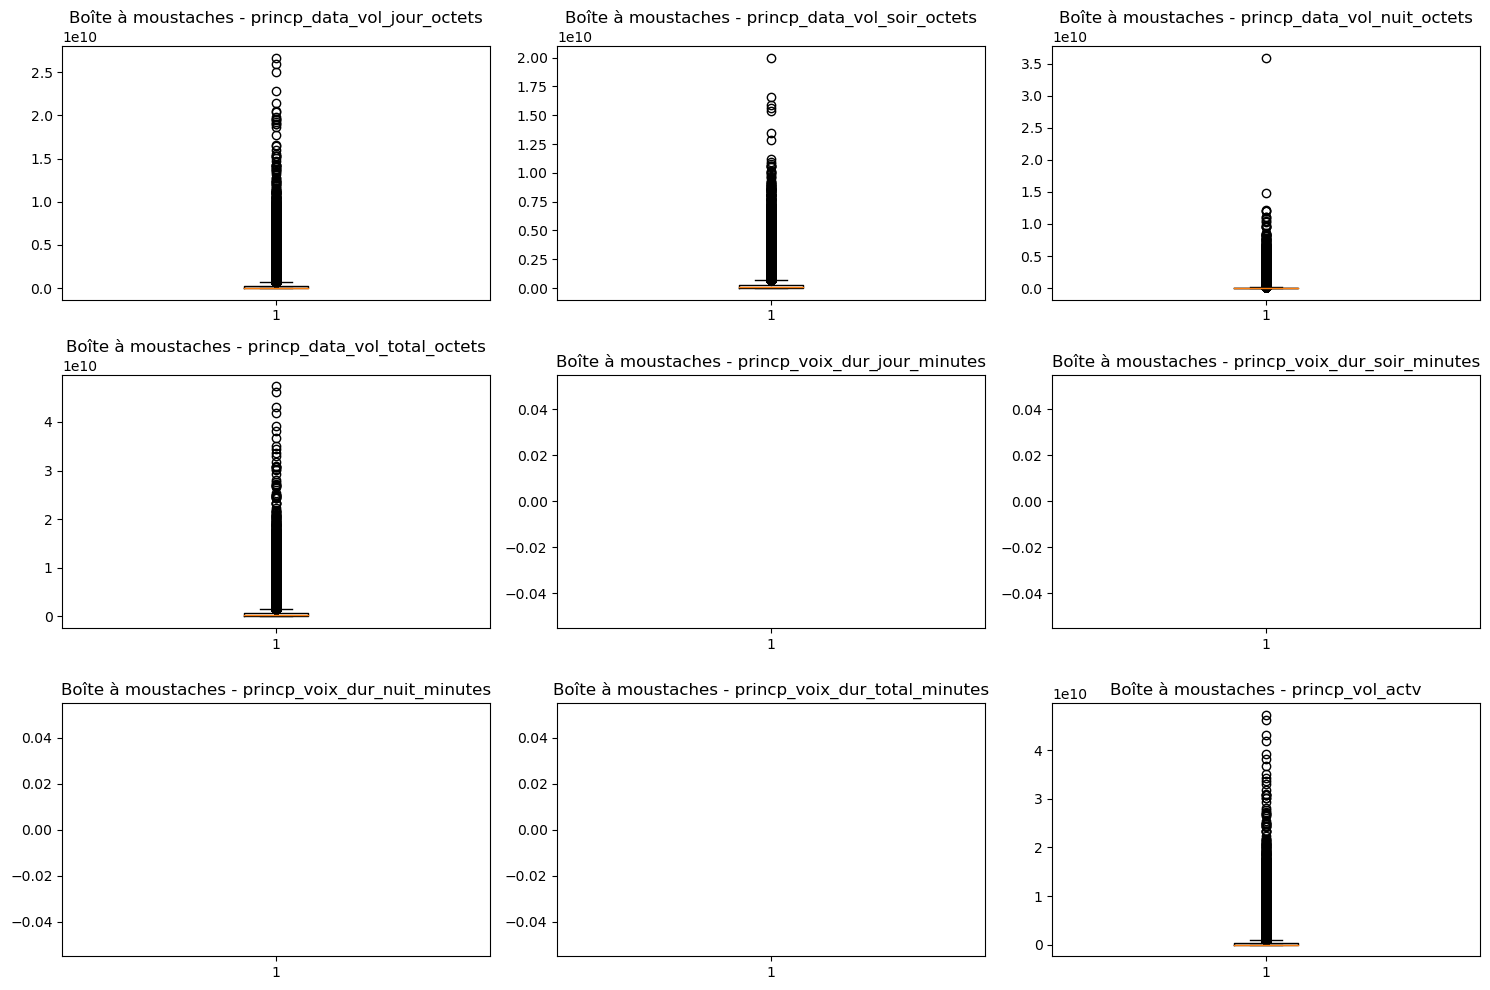

In [17]:
import matplotlib.pyplot as plt

# Créer une figure et des axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Tracer la boîte à moustaches pour la colonne "princp_data_vol_jour_octets"
axes[0, 0].boxplot(data["princp_data_vol_jour_octets"])
axes[0, 0].set_title("Boîte à moustaches - princp_data_vol_jour_octets")

# Tracer la boîte à moustaches pour la colonne "princp_data_vol_soir_octets"
axes[0, 1].boxplot(data["princp_data_vol_soir_octets"])
axes[0, 1].set_title("Boîte à moustaches - princp_data_vol_soir_octets")

# Tracer la boîte à moustaches pour la colonne "princp_data_vol_nuit_octets"
axes[0, 2].boxplot(data["princp_data_vol_nuit_octets"])
axes[0, 2].set_title("Boîte à moustaches - princp_data_vol_nuit_octets")

# Tracer la boîte à moustaches pour la colonne "princp_data_vol_total_octets"
axes[1, 0].boxplot(data["princp_data_vol_total_octets"])
axes[1, 0].set_title("Boîte à moustaches - princp_data_vol_total_octets")

# Tracer la boîte à moustaches pour la colonne "princp_voix_dur_jour_minutes"
axes[1, 1].boxplot(data["princp_voix_dur_jour_minutes"])
axes[1, 1].set_title("Boîte à moustaches - princp_voix_dur_jour_minutes")

# Tracer la boîte à moustaches pour la colonne "princp_voix_dur_soir_minutes"
axes[1, 2].boxplot(data["princp_voix_dur_soir_minutes"])
axes[1, 2].set_title("Boîte à moustaches - princp_voix_dur_soir_minutes")

# Tracer la boîte à moustaches pour la colonne "princp_voix_dur_nuit_minutes"
axes[2, 0].boxplot(data["princp_voix_dur_nuit_minutes"])
axes[2, 0].set_title("Boîte à moustaches - princp_voix_dur_nuit_minutes")

# Tracer la boîte à moustaches pour la colonne "princp_voix_dur_total_minutes"
axes[2, 1].boxplot(data["princp_voix_dur_total_minutes"])
axes[2, 1].set_title("Boîte à moustaches - princp_voix_dur_total_minutes")

# Tracer la boîte à moustaches pour la colonne "princp_vol_actv"
axes[2, 2].boxplot(data["princp_vol_actv"])
axes[2, 2].set_title("Boîte à moustaches - princp_vol_actv")

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()


In [16]:
print(data.columns)

Index(['mdn', 'imsi', 'idnt_contrat', 'idnt_client_crm',
       'idnt_compte_facturation', 'idnt_profil', 'desc_profil', 'sous_profil',
       'gamme', 'marche', 'princp_data_vol_jour_octets',
       'princp_data_vol_jour_cell', 'princp_data_vol_jour_secteur',
       'princp_data_vol_jour_bts', 'princp_data_vol_jour_ville',
       'princp_data_vol_jour_region', 'princp_data_vol_jour_province',
       'princp_data_vol_soir_octets', 'princp_data_vol_soir_cell',
       'princp_data_vol_soir_secteur', 'princp_data_vol_soir_bts',
       'princp_data_vol_soir_ville', 'princp_data_vol_soir_region',
       'princp_data_vol_soir_province', 'princp_data_vol_nuit_octets',
       'princp_data_vol_nuit_cell', 'princp_data_vol_nuit_secteur',
       'princp_data_vol_nuit_bts', 'princp_data_vol_nuit_ville',
       'princp_data_vol_nuit_region', 'princp_data_vol_nuit_province',
       'princp_data_vol_total_octets', 'princp_data_vol_total_cell',
       'princp_data_vol_total_secteur', 'princp_data_vol_

In [7]:
for column in data.columns:
    mapping = data[column].value_counts()
    print(f"Mapping for column '{column}':\n{mapping}\n")

Mapping for column 'mdn':
479e5ba06010b11c6618fff004e01a99    1
ca8ff091831f7777dd418a098df3af41    1
e6290f091b37bbd32b543b82a51bd5a9    1
08d94a8b9da98459791cd41a73990b0f    1
7e5bb73a4c21308a64e9985236c0f3c8    1
                                   ..
a0b90ef4d11b13eaf75ad97859d994f3    1
baa31104b2ea5d5d02bcd5e446cf26d3    1
8d546f12bd663fa012836652fbe62956    1
ad8c06ac00757bf98e1f917955dfbd5f    1
12a45628aee16fa9a46b5f4fc197a9ba    1
Name: mdn, Length: 100000, dtype: int64

Mapping for column 'imsi':
7f723cf242e408c9ae33705362d3229d    1
d1c00ec5f67d2d5a90fbef1c57717395    1
0048434ca9ef851144f23d16d72e3c5e    1
5be91c7c5748aced98f6854608b225cc    1
5c1e5514f0e7cb9620c0b8aba84f56fd    1
                                   ..
d2f2e86ee089ea971d1ccb065c45e0b5    1
da30737cdfc6b0b7944a86f0eb12a169    1
71f0113e5ba51bf0908f906b325ac0c0    1
f27928ece9b52b57fd3d1cdc41e80d3e    1
0b01cdf8686edd81f888a07104c10013    1
Name: imsi, Length: 100000, dtype: int64

Mapping for column 'idnt_con

Mapping for column 'princp_data_vol_nuit_cell':
* Key not found      18942
6040204D0023A7C09      257
6040204CF0226DF08      113
6040203E90186DE09       93
604020474029BFC08       84
                     ...  
604020102931107          1
6040203E901872369        1
604020100206080          1
604020117408406          1
604020123328369          1
Name: princp_data_vol_nuit_cell, Length: 19461, dtype: int64

Mapping for column 'princp_data_vol_nuit_secteur':
* Key not found    18942
LBI-1044_L-83        257
BER-1023_L-82        113
CAS-1062_L-83         93
BAH-1004_L-82         84
                   ...  
CAS-1131_L-M5          1
CAS-1800_U-1           1
CAS-1306_U-7           1
LBI-1014_L-T1          1
CAS-1369_U-9           1
Name: princp_data_vol_nuit_secteur, Length: 19459, dtype: int64

Mapping for column 'princp_data_vol_nuit_bts':
* Key not found    18942
LBI-1044             456
BER-1023             346
CAS-1515             314
CAS-1062             312
                   ...  
GHA-1

Mapping for column 'princp_voix_dur_soir_minutes':
0.000000     9962
1.000000      228
0.233333      217
0.483333      189
0.600000      187
             ... 
18.550000       1
60.383333       1
22.716667       1
32.900000       1
34.166667       1
Name: princp_voix_dur_soir_minutes, Length: 2373, dtype: int64

Mapping for column 'princp_voix_dur_soir_cell':
* Value not available    65880
* Key not found           9962
604020117442157             40
604020117414427             32
604020123122712             30
                         ...  
604020102909719              1
604020123122741              1
604020123122749              1
604020117334851              1
604020123328466              1
Name: princp_voix_dur_soir_cell, Length: 7643, dtype: int64

Mapping for column 'princp_voix_dur_soir_secteur':
* Value not available    65880
* Key not found           9962
CAS-1352_UO-91              40
CAS-1515_UO-91              32
BER-1012_U-3                30
                         ...  


Mapping for column 'princp_actv_total_cell':
6040204D0023A7C09    160
604020123259915       94
6040203E90186DE09     77
6040204CF0226DF08     71
604020474029BFC08     67
                    ... 
6040204740236D403      1
604020111700319        1
6040203E901870465      1
6040203EA0186F767      1
604020123328466        1
Name: princp_actv_total_cell, Length: 22588, dtype: int64

Mapping for column 'princp_actv_total_secteur':
LBI-1044_L-83    160
LBI-1044_U-93     94
CAS-1062_L-83     77
BER-1023_L-82     71
BAH-1004_L-82     67
                ... 
CAS-1213_L-3       1
CAS-1375_U-3       1
MOH-1090_L-3       1
CAS-1508_L-1       1
CAS-1466_U-9       1
Name: princp_actv_total_secteur, Length: 22587, dtype: int64

Mapping for column 'princp_actv_total_bts':
LBI-1044    431
BAH-1004    408
BER-1023    405
CAS-1515    398
CAS-1062    397
           ... 
CAS-1208      1
CAS-9049      1
CAS-9099      1
CAS-9047      1
SBE-9002      1
Name: princp_actv_total_bts, Length: 1271, dtype: int64

Map

C:\Users\hp\AppData\Local\Temp\ipykernel_10468\2607335849.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


                               princp_data_vol_jour_octets  \
princp_data_vol_jour_octets                       1.000000   
princp_data_vol_soir_octets                       0.726197   
princp_data_vol_nuit_octets                       0.502778   
princp_data_vol_total_octets                      0.925629   
princp_voix_dur_jour_minutes                      0.043948   
princp_voix_dur_soir_minutes                      0.029155   
princp_voix_dur_nuit_minutes                      0.013024   
princp_voix_dur_total_minutes                     0.040934   
princp_vol_actv                                   0.902604   

                               princp_data_vol_soir_octets  \
princp_data_vol_jour_octets                       0.726197   
princp_data_vol_soir_octets                       1.000000   
princp_data_vol_nuit_octets                       0.497591   
princp_data_vol_total_octets                      0.880193   
princp_voix_dur_jour_minutes                      0.024898   
princp_

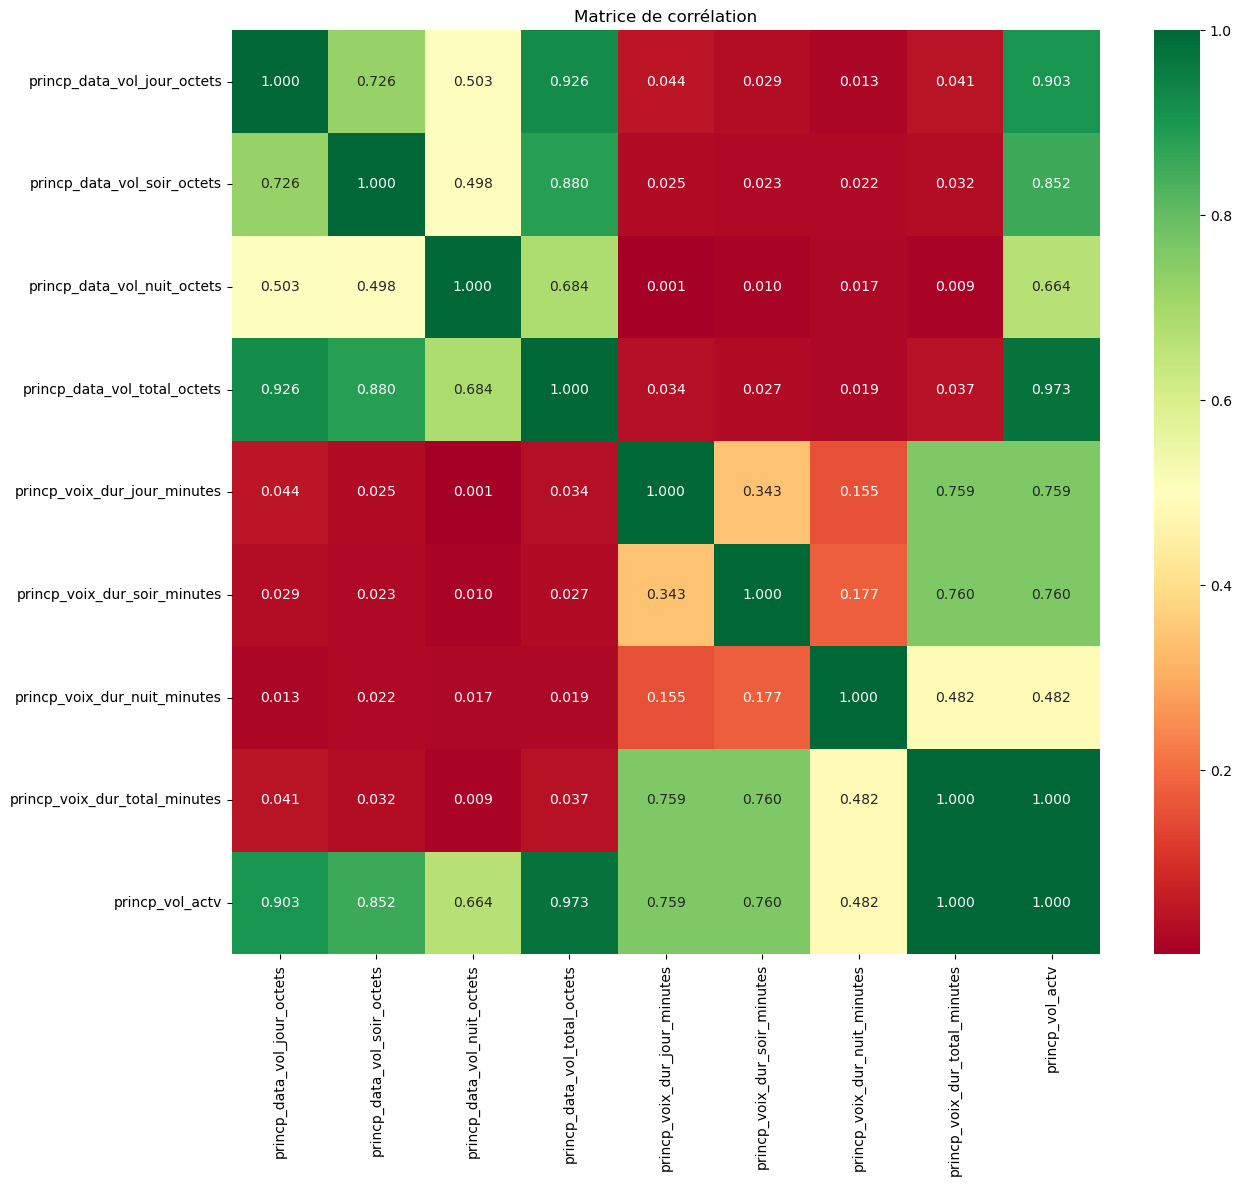

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
#colonnes numeriques
correlation_matrix = data.corr()
print(correlation_matrix)
plt.figure(figsize=(14,12))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='RdYlGn')
plt.title('Matrice de corrélation')
plt.show()

In [18]:
# Select columns with categorical data
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
# Calculate correlation between categorical columns
correlation_matrix = data[categorical_columns].apply(lambda x: x.astype('category').cat.codes).corr(method='pearson')
print(correlation_matrix)

                                mdn      imsi  idnt_contrat  idnt_client_crm  \
mdn                        1.000000  0.004379      0.000544        -0.000554   
imsi                       0.004379  1.000000     -0.003181        -0.000540   
idnt_contrat               0.000544 -0.003181      1.000000         0.000797   
idnt_client_crm           -0.000554 -0.000540      0.000797         1.000000   
idnt_compte_facturation   -0.004268 -0.003944      0.002791         0.014129   
...                             ...       ...           ...              ...   
princp_actv_total_secteur -0.009340  0.000819     -0.000714         0.001970   
princp_actv_total_bts     -0.009446  0.000765     -0.000757         0.002062   
princp_actv_ville         -0.005905 -0.003305     -0.000864         0.001867   
princp_actv_province       0.001295 -0.007421      0.003672        -0.001214   
princp_vol_actv_unit      -0.003026 -0.000072      0.001801        -0.000142   

                           idnt_compte_

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = data2.select_dtypes(include=['object', 'category']).columns
correlation_matrix = data2[categorical_columns].apply(lambda x: x.astype('category').cat.codes).corr(method='pearson')
print(correlation_matrix)
plt.figure(figsize=(14,12))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='RdYlGn')
plt.title('Matrice de corrélation')
plt.show()

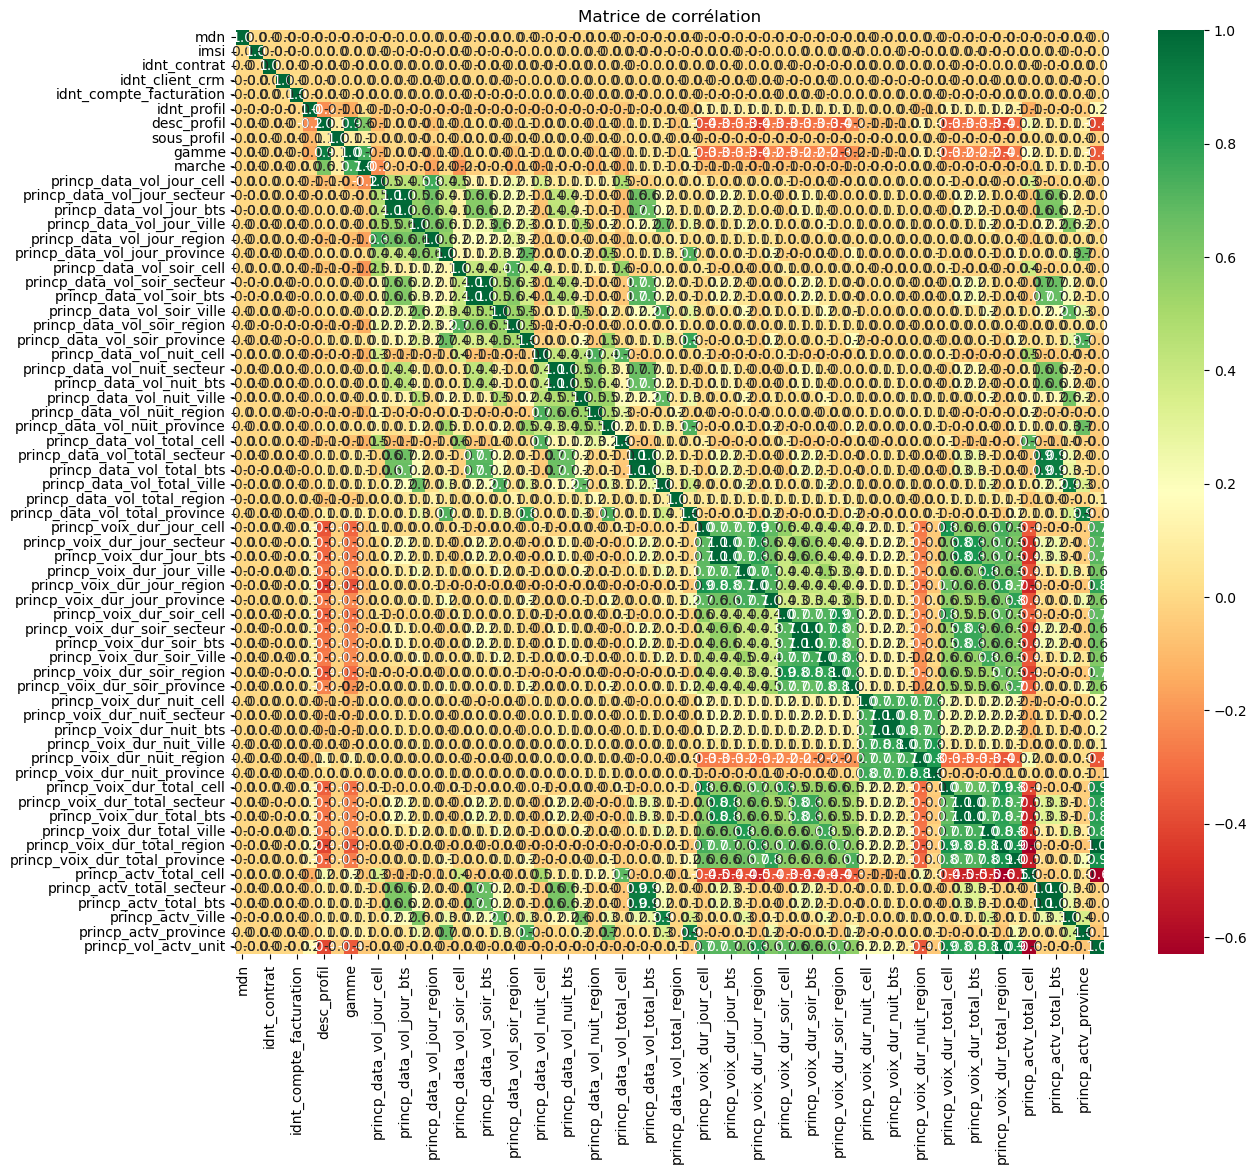

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,12))
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='RdYlGn')
plt.title('Matrice de corrélation')
plt.show()

In [20]:
#supression des colonnes numeriques
columns_to_drop2 =['princp_data_vol_jour_octets', 'princp_data_vol_soir_octets', 'princp_data_vol_nuit_octets','princp_data_vol_total_octets', 'princp_voix_dur_jour_minutes', 'princp_voix_dur_soir_minutes',
                   'princp_voix_dur_nuit_minutes', 'princp_voix_dur_total_minutes','princp_vol_actv' ]
data2= data.drop(columns=columns_to_drop2)
print(data2.columns)

Index(['mdn', 'imsi', 'idnt_contrat', 'idnt_client_crm',
       'idnt_compte_facturation', 'idnt_profil', 'desc_profil', 'sous_profil',
       'gamme', 'marche', 'princp_data_vol_jour_cell',
       'princp_data_vol_jour_secteur', 'princp_data_vol_jour_bts',
       'princp_data_vol_jour_ville', 'princp_data_vol_jour_region',
       'princp_data_vol_jour_province', 'princp_data_vol_soir_cell',
       'princp_data_vol_soir_secteur', 'princp_data_vol_soir_bts',
       'princp_data_vol_soir_ville', 'princp_data_vol_soir_region',
       'princp_data_vol_soir_province', 'princp_data_vol_nuit_cell',
       'princp_data_vol_nuit_secteur', 'princp_data_vol_nuit_bts',
       'princp_data_vol_nuit_ville', 'princp_data_vol_nuit_region',
       'princp_data_vol_nuit_province', 'princp_data_vol_total_cell',
       'princp_data_vol_total_secteur', 'princp_data_vol_total_bts',
       'princp_data_vol_total_ville', 'princp_data_vol_total_region',
       'princp_data_vol_total_province', 'princp_voix_dur

In [22]:
columns_to_drop3 = [ 'mdn', 'imsi', 'idnt_contrat', 'idnt_client_crm','idnt_compte_facturation', 'idnt_profil', 'desc_profil', 'sous_profil','gamme', 'marche', 'princp_data_vol_jour_cell','princp_data_vol_jour_secteur', 'princp_data_vol_jour_bts','princp_data_vol_jour_ville', 'princp_data_vol_jour_region','princp_data_vol_jour_province','princp_data_vol_soir_cell', 'princp_data_vol_soir_secteur','princp_data_vol_soir_bts', 'princp_data_vol_soir_ville','princp_data_vol_soir_region', 'princp_data_vol_soir_province','princp_data_vol_nuit_cell','princp_data_vol_nuit_secteur', 'princp_data_vol_nuit_bts','princp_data_vol_nuit_ville', 'princp_data_vol_nuit_region','princp_data_vol_nuit_province','princp_data_vol_total_cell', 'princp_data_vol_total_secteur','princp_data_vol_total_bts', 'princp_data_vol_total_ville','princp_data_vol_total_region', 'princp_data_vol_total_province']
data_voix= data2.drop(columns=columns_to_drop3)
print(data_voix.columns)

Index(['princp_voix_dur_jour_cell', 'princp_voix_dur_jour_secteur',
       'princp_voix_dur_jour_bts', 'princp_voix_dur_jour_ville',
       'princp_voix_dur_jour_region', 'princp_voix_dur_jour_province',
       'princp_voix_dur_soir_cell', 'princp_voix_dur_soir_secteur',
       'princp_voix_dur_soir_bts', 'princp_voix_dur_soir_ville',
       'princp_voix_dur_soir_region', 'princp_voix_dur_soir_province',
       'princp_voix_dur_nuit_cell', 'princp_voix_dur_nuit_secteur',
       'princp_voix_dur_nuit_bts', 'princp_voix_dur_nuit_ville',
       'princp_voix_dur_nuit_region', 'princp_voix_dur_nuit_province',
       'princp_voix_dur_total_cell', 'princp_voix_dur_total_secteur',
       'princp_voix_dur_total_bts', 'princp_voix_dur_total_ville',
       'princp_voix_dur_total_region', 'princp_voix_dur_total_province',
       'princp_actv_total_cell', 'princp_actv_total_secteur',
       'princp_actv_total_bts', 'princp_actv_ville', 'princp_actv_province',
       'princp_vol_actv_unit'],
      d

                                princp_voix_dur_jour_cell  \
princp_voix_dur_jour_cell                        1.000000   
princp_voix_dur_jour_secteur                     0.693520   
princp_voix_dur_jour_bts                         0.688979   
princp_voix_dur_jour_ville                       0.684519   
princp_voix_dur_jour_region                      0.850399   
princp_voix_dur_jour_province                    0.686413   
princp_voix_dur_soir_cell                        0.559863   
princp_voix_dur_soir_secteur                     0.403119   
princp_voix_dur_soir_bts                         0.400317   
princp_voix_dur_soir_ville                       0.411047   
princp_voix_dur_soir_region                      0.412255   
princp_voix_dur_soir_province                    0.381465   
princp_voix_dur_nuit_cell                        0.176062   
princp_voix_dur_nuit_secteur                     0.132170   
princp_voix_dur_nuit_bts                         0.129551   
princp_voix_dur_nuit_vil

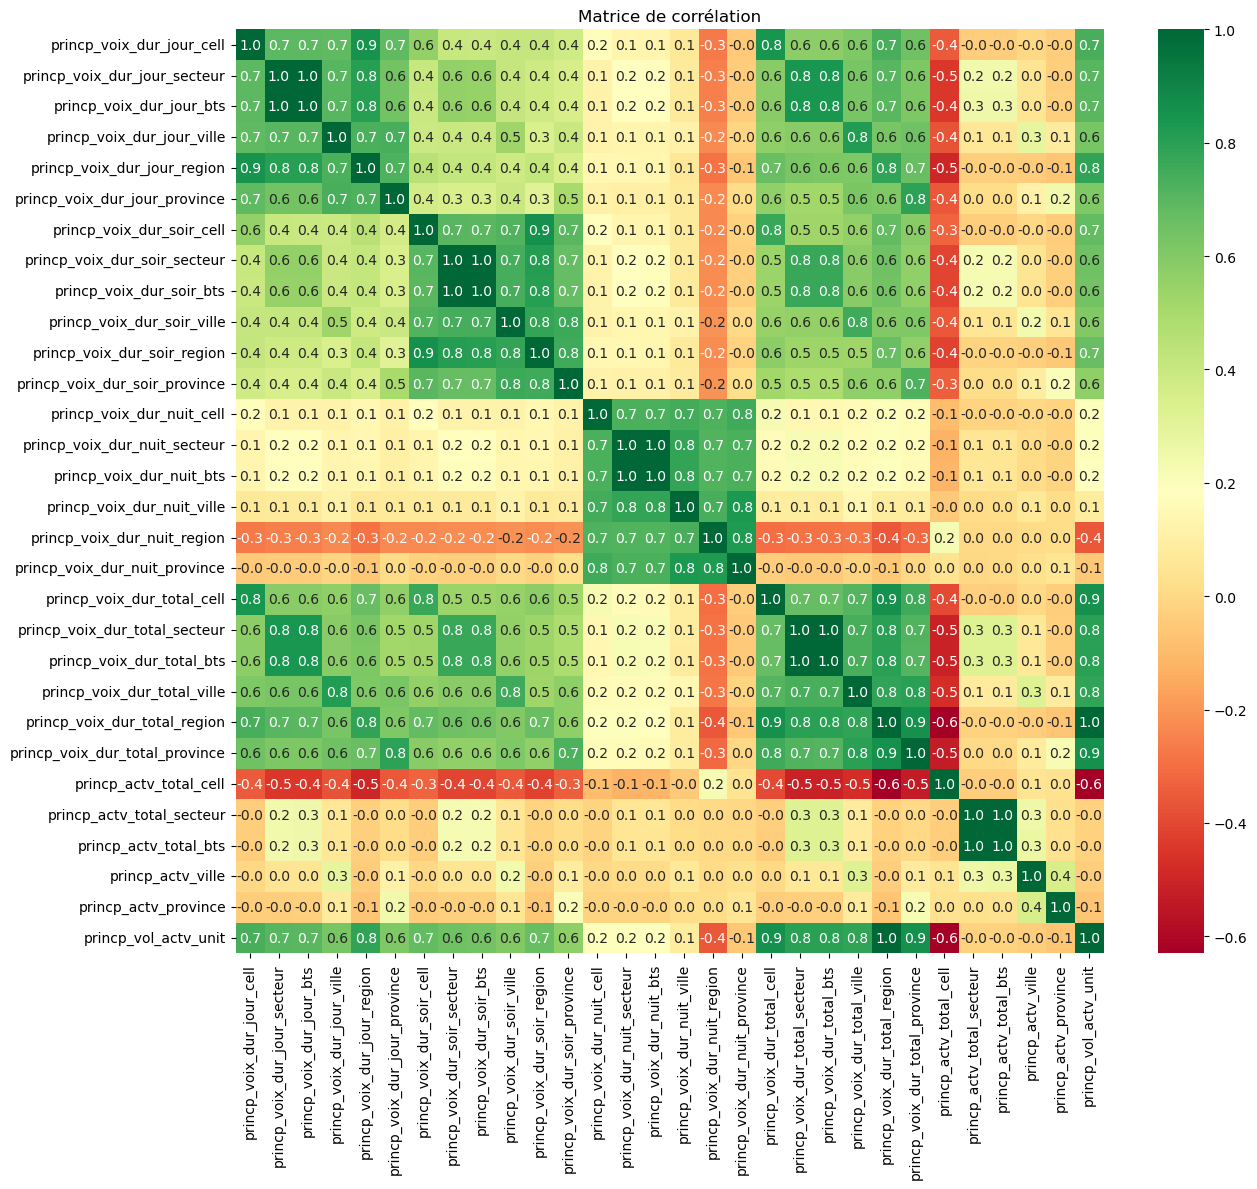

In [23]:
categorical_columns = data_voix.select_dtypes(include=['object', 'category']).columns
correlation_matrix = data_voix[categorical_columns].apply(lambda x: x.astype('category').cat.codes).corr(method='pearson')
print(correlation_matrix)
plt.figure(figsize=(14,12))
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='RdYlGn')
plt.title('Matrice de corrélation')
plt.show()

In [24]:
columns_to_drop3 = [ 'mdn', 'imsi', 'idnt_contrat', 'idnt_client_crm','idnt_compte_facturation', 'idnt_profil', 'desc_profil', 'sous_profil','gamme', 'marche', 'princp_voix_dur_jour_cell','princp_voix_dur_jour_secteur', 'princp_voix_dur_jour_bts','princp_voix_dur_jour_ville', 'princp_voix_dur_jour_region','princp_voix_dur_jour_province','princp_voix_dur_soir_cell', 'princp_voix_dur_soir_secteur','princp_voix_dur_soir_bts', 'princp_voix_dur_soir_ville','princp_voix_dur_soir_region', 'princp_voix_dur_soir_province','princp_voix_dur_nuit_cell','princp_voix_dur_nuit_secteur', 'princp_voix_dur_nuit_bts','princp_voix_dur_nuit_ville', 'princp_voix_dur_nuit_region','princp_voix_dur_nuit_province','princp_voix_dur_total_cell', 'princp_voix_dur_total_secteur','princp_voix_dur_total_bts', 'princp_voix_dur_total_ville','princp_voix_dur_total_region', 'princp_voix_dur_total_province']
data_data= data2.drop(columns=columns_to_drop3)
print(data_data.columns)

Index(['princp_data_vol_jour_cell', 'princp_data_vol_jour_secteur',
       'princp_data_vol_jour_bts', 'princp_data_vol_jour_ville',
       'princp_data_vol_jour_region', 'princp_data_vol_jour_province',
       'princp_data_vol_soir_cell', 'princp_data_vol_soir_secteur',
       'princp_data_vol_soir_bts', 'princp_data_vol_soir_ville',
       'princp_data_vol_soir_region', 'princp_data_vol_soir_province',
       'princp_data_vol_nuit_cell', 'princp_data_vol_nuit_secteur',
       'princp_data_vol_nuit_bts', 'princp_data_vol_nuit_ville',
       'princp_data_vol_nuit_region', 'princp_data_vol_nuit_province',
       'princp_data_vol_total_cell', 'princp_data_vol_total_secteur',
       'princp_data_vol_total_bts', 'princp_data_vol_total_ville',
       'princp_data_vol_total_region', 'princp_data_vol_total_province',
       'princp_actv_total_cell', 'princp_actv_total_secteur',
       'princp_actv_total_bts', 'princp_actv_ville', 'princp_actv_province',
       'princp_vol_actv_unit'],
      d

                                princp_data_vol_jour_cell  \
princp_data_vol_jour_cell                        1.000000   
princp_data_vol_jour_secteur                     0.464691   
princp_data_vol_jour_bts                         0.444827   
princp_data_vol_jour_ville                       0.494251   
princp_data_vol_jour_region                      0.753785   
princp_data_vol_jour_province                    0.443013   
princp_data_vol_soir_cell                        0.494921   
princp_data_vol_soir_secteur                     0.127746   
princp_data_vol_soir_bts                         0.119945   
princp_data_vol_soir_ville                       0.159284   
princp_data_vol_soir_region                      0.246089   
princp_data_vol_soir_province                    0.137215   
princp_data_vol_nuit_cell                        0.348893   
princp_data_vol_nuit_secteur                     0.071730   
princp_data_vol_nuit_bts                         0.067877   
princp_data_vol_nuit_vil

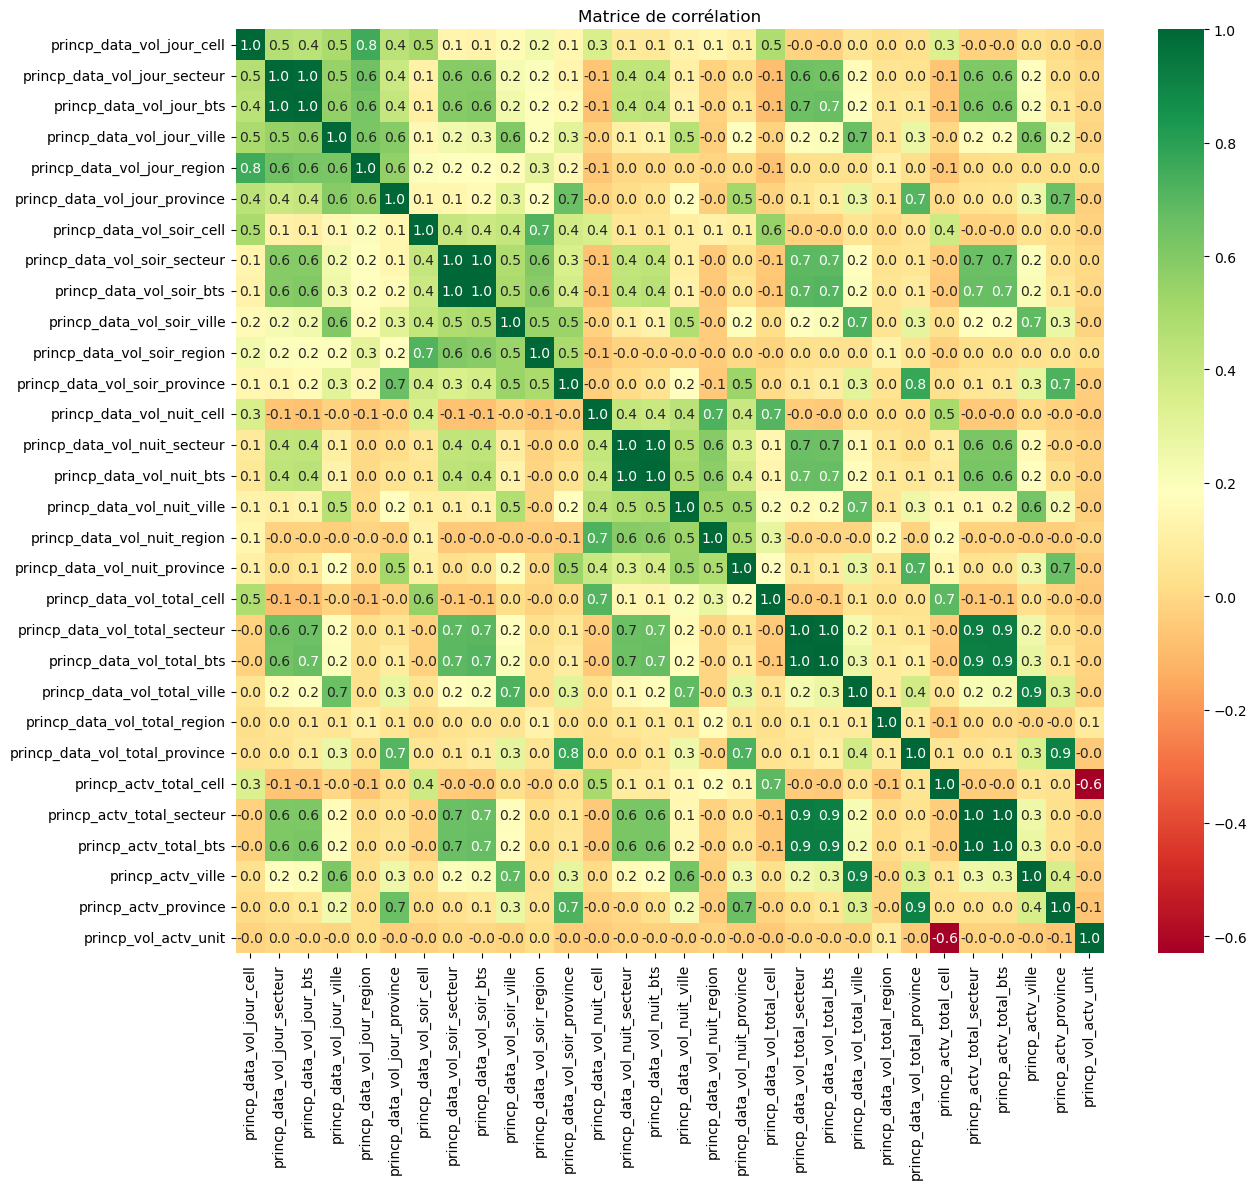

In [26]:
categorical_columns = data_data.select_dtypes(include=['object', 'category']).columns
correlation_matrix = data_data[categorical_columns].apply(lambda x: x.astype('category').cat.codes).corr(method='pearson')
print(correlation_matrix)
plt.figure(figsize=(14,12))
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='RdYlGn')
plt.title('Matrice de corrélation')
plt.show()

In [27]:
columns_to_drop3 = ['princp_data_vol_jour_cell','princp_data_vol_jour_secteur', 'princp_data_vol_jour_bts','princp_data_vol_jour_ville', 'princp_data_vol_jour_region','princp_data_vol_jour_province','princp_data_vol_soir_cell', 'princp_data_vol_soir_secteur','princp_data_vol_soir_bts', 'princp_data_vol_soir_ville','princp_data_vol_soir_region', 'princp_data_vol_soir_province','princp_data_vol_nuit_cell','princp_data_vol_nuit_secteur', 'princp_data_vol_nuit_bts','princp_data_vol_nuit_ville', 'princp_data_vol_nuit_region','princp_data_vol_nuit_province','princp_data_vol_total_cell', 'princp_data_vol_total_secteur','princp_data_vol_total_bts', 'princp_data_vol_total_ville','princp_data_vol_total_region', 'princp_data_vol_total_province','princp_voix_dur_jour_cell','princp_voix_dur_jour_secteur', 'princp_voix_dur_jour_bts','princp_voix_dur_jour_ville', 'princp_voix_dur_jour_region','princp_voix_dur_jour_province','princp_voix_dur_soir_cell', 'princp_voix_dur_soir_secteur','princp_voix_dur_soir_bts', 'princp_voix_dur_soir_ville','princp_voix_dur_soir_region', 'princp_voix_dur_soir_province','princp_voix_dur_nuit_cell','princp_voix_dur_nuit_secteur', 'princp_voix_dur_nuit_bts','princp_voix_dur_nuit_ville', 'princp_voix_dur_nuit_region','princp_voix_dur_nuit_province','princp_voix_dur_total_cell', 'princp_voix_dur_total_secteur','princp_voix_dur_total_bts', 'princp_voix_dur_total_ville','princp_voix_dur_total_region', 'princp_voix_dur_total_province']
data_info= data2.drop(columns=columns_to_drop3)
print(data_info.columns)

Index(['mdn', 'imsi', 'idnt_contrat', 'idnt_client_crm',
       'idnt_compte_facturation', 'idnt_profil', 'desc_profil', 'sous_profil',
       'gamme', 'marche', 'princp_actv_total_cell',
       'princp_actv_total_secteur', 'princp_actv_total_bts',
       'princp_actv_ville', 'princp_actv_province', 'princp_vol_actv_unit'],
      dtype='object')


                                mdn      imsi  idnt_contrat  idnt_client_crm  \
mdn                        1.000000  0.004379      0.000544        -0.000554   
imsi                       0.004379  1.000000     -0.003181        -0.000540   
idnt_contrat               0.000544 -0.003181      1.000000         0.000797   
idnt_client_crm           -0.000554 -0.000540      0.000797         1.000000   
idnt_compte_facturation   -0.004268 -0.003944      0.002791         0.014129   
idnt_profil               -0.000911 -0.000690     -0.001926        -0.004662   
desc_profil               -0.000681  0.004471     -0.002569         0.001968   
sous_profil               -0.002880  0.000097      0.003355        -0.001501   
gamme                     -0.001779  0.004678     -0.002997         0.001290   
marche                    -0.004632  0.002710     -0.002809         0.002109   
princp_actv_total_cell    -0.001107  0.001884      0.006831         0.001157   
princp_actv_total_secteur -0.009340  0.0

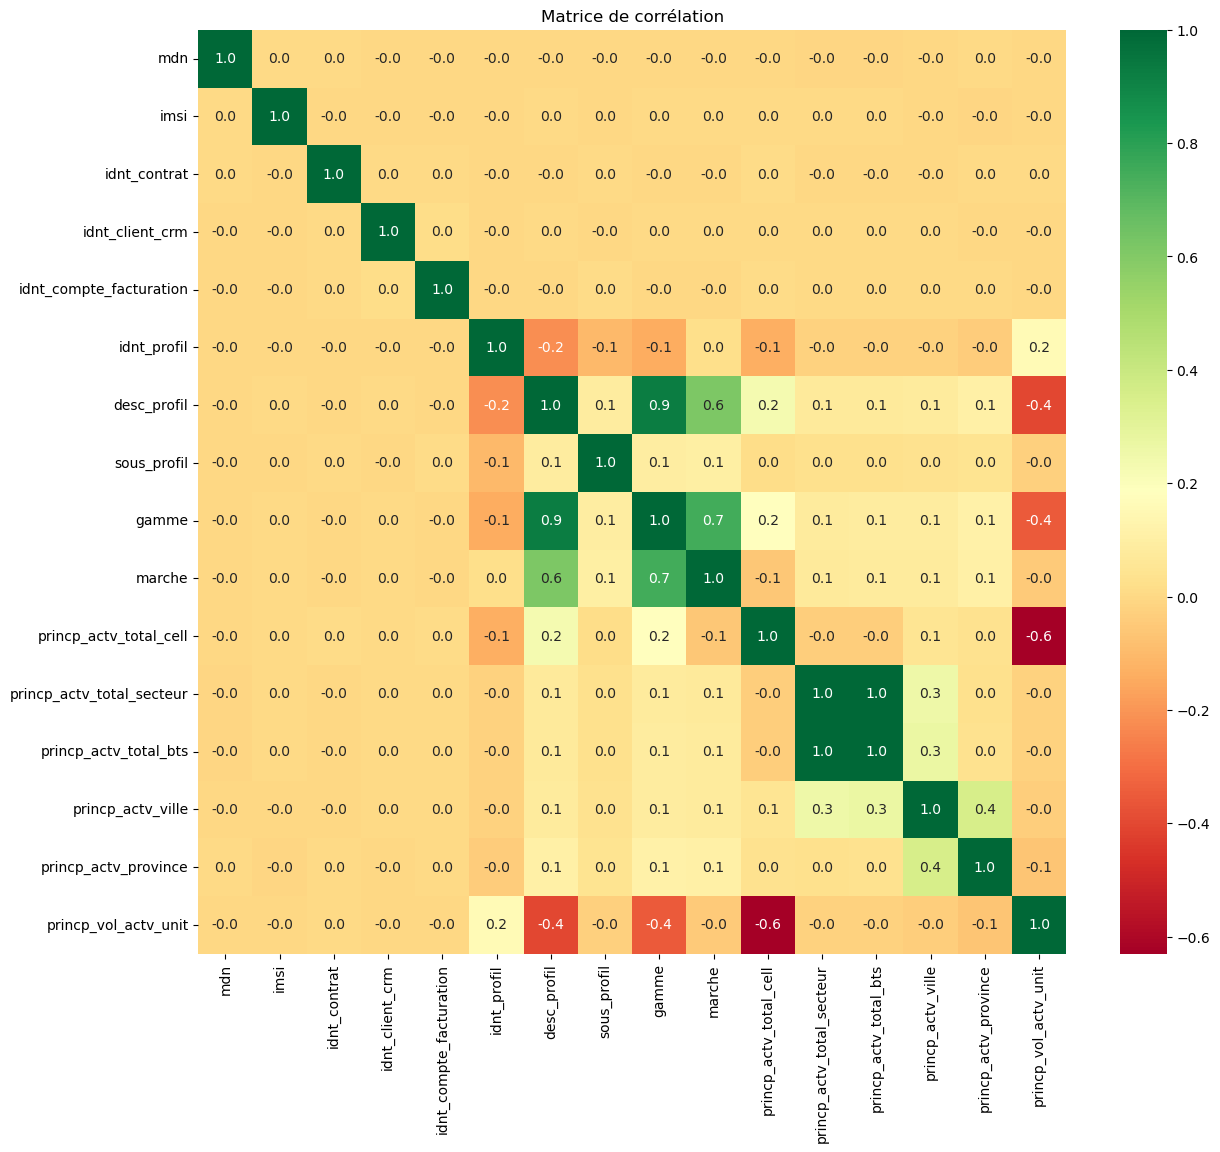

In [28]:
categorical_columns = data_info.select_dtypes(include=['object', 'category']).columns
correlation_matrix = data[categorical_columns].apply(lambda x: x.astype('category').cat.codes).corr(method='pearson')
print(correlation_matrix)
plt.figure(figsize=(14,12))
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='RdYlGn')
plt.title('Matrice de corrélation')
plt.show()